#  EDA-3. Проектирование признаков 

проектировании признаков (Feature Engineering). Этот процесс также называют конструированием признаков или разработкой признаков.

На этапе проектирования признаков специалисты по данным преследуют такие же цели, как на этапе сбора данных — сконструировать как можно больше признаков, чтобы далее отобрать из них лучшие.

## 2. Создание признаков

Проектирование признаков — самый творческий процесс во всём цикле жизни создания модели машинного обучения. 

Он включает в себя несколько этапов: 

    создание признаков;
    преобразование признаков;
    отбор признаков.

Проектирование признаков необходимо для улучшения качества будущей модели: в процессе создания признаков появляются новые, возможно, более качественные, чем исходные.

Новые признаки могут быть сконструированы двумя способами: 

    1 с помощью внешних источников данных;
    2 из существующего набора данных.

Новые признаки можно сконструировать из уже существующего набора данных несколькими способами: 

   1 разбор категорий; 
   2 разбор даты и времени;
   3 разбор числовых признаков;
   4 разбор текста.

In [17]:
import pandas as pd

data = pd.read_csv('wine_cleared.csv')

#display(data.head())

### Разбор даты и времени

Признаки, обозначающие дату и время, могут содержать много полезной информации. 

Например, в нашем датасете в названии вина можно увидеть год производства вина. Этот признак может оказаться важным для определения рейтинга вина. Однако, пока он заключен в названии вина, модель не сможет его использовать.

In [18]:
# для удобства сразу преобразуем признак в int
data['price_round'] = data['price'].round().astype(int)

#display(data.head())

Для таких преобразований важен контекст. В контексте вина для сомелье цена в 35$ и 35.363389$ одинакова. Вы делаете округление признака, чтобы модель также не сосредотачивалась на сотых. Это может помочь улучшить предсказание.

Помимо округления для создания новых признаков могут применяться такие популярные операции, как логарифмирование числового признака или извлечение его корня. Это подразумевает создание признаков в наиболее удобной форме для обучения модели. О необходимости таких преобразований вы узнаете далее в юните преобразования данных.

### Разбор текста

Текстовые признаки могут содержать в себе большое количество информации. Например, если бы наша модель умела распознавать текст, то из описания вина мы бы могли понять, какими словами сомелье чаще характеризуют качественное вино. Вы можете воспользоваться методами извлечения слов из текста, чтобы получить новые признаки.

В названии вина вы можете заметить указание года произведения вина. Чтобы узнать, влияет ли год на рейтинг вина, вам необходимо выделить год в отдельный признак.

Для того, чтобы извлечь из строки число, обозначающее год, необходимо воспользоваться регулярными выражениями.

Регулярные выражения (regexp, или regex) — это механизм для поиска и замены текста. Это шаблоны, которые используются для поиска соответствующей части текста.

Например, с помощью такого регулярного выражения [^@ \t\r\n]+@[^@ \t\r\n]+\.[^@ \t\r\n]+ можно найти любой email в тексте.

In [19]:
regex = '\d{4}' # регулярное выражение для нахождения чисел
data['year'] = data['title'].str.findall(regex).str.get(0)
display(data.head(3))

,country,description,designation,points,price,province,region_1,taster_name,taster_twitter_handle,title,variety,winery,price_round,year
0,Italy,"Aromas include tropical fruit, broom, brimston...",Vulkà Bianco,87,35.363389,Sicily & Sardinia,Etna,Kerin O’Keefe,@kerinokeefe,Nicosia 2013 Vulkà Bianco (Etna),White Blend,Nicosia,35,2013
1,Portugal,"This is ripe and fruity, a wine that is smooth...",Avidagos,87,15.000000,Douro,unknown,Roger Voss,@vossroger,Quinta dos Avidagos 2011 Avidagos Red (Douro),Portuguese Red,Quinta dos Avidagos,15,2011
2,US,"Tart and snappy, the flavors of lime flesh and...",unknown,87,14.000000,Oregon,Willamette Valley,Paul Gregutt,@paulgwine,Rainstorm 2013 Pinot Gris (Willamette Valley),Pinot Gris,Rainstorm,14,2013


Разберём регулярное выражение \d+:

    \d — класс символов, обозначает соответствие цифрам в диапазоне цифр [0-9];
    {4} в шаблоне означает искать четыре вхождения символа, указанного ранее. В нашем случае это будут четырехзначные числа.

Таким образом, \d{4} означает четырехзначных чисел в заданной строке.

Проверить, насколько точно работает ваше регулярное выражение, а также найти реализацию популярных регулярных выражений (например, поиска номера телефона), вы сможете на сайте https://ihateregex.io.

Однако при поиске числа методом data['title'].str.findall(regex) результатом выполнения является список найденных цифр. Поэтому необходимо извлечь первый элемент из списка найденных методом str.get(0), где 0 — первый элемент в списке найденных чисел.

Используя методы работы со строками pandas и регулярные выражения, можно извлечь любую информацию для новых признаков: даты, слова и выражения.

### Разбор категорий

В наборе данных винных обзоров самая популярная страна-производитель вина — США. Возможно, это не случайность, и факт производства в США влияет на рейтинг вина. Выделим этот факт.

Вы можете создать новый бинарный признак is_usa и присвоить ему 1 в случае, если вино произведено в США, иначе — 0.

data['is_usa'] = data['country'].apply(lambda x: 1 if x == 'US' else 0)



In [20]:
data['is_usa'] = data['country'].apply(lambda x: 1 if x == 'US' else 0)

print(data['is_usa'].sum())

54567


In [ ]:
print(data['country'].value_counts())

In [22]:
data['is_france'] = data['country'].apply(lambda x: 1 if x == 'France' else 0)
data['is_italy'] = data['country'].apply(lambda x: 1 if x == 'Italy' else 0)
print('Вино из Франции:', data['is_france'].sum())
print('Вино из Италии:', data['is_italy'].sum())

Вино из Франции: 22093
Вино из Италии: 19540


Попробуем вывести правило в определении качества вина: старые вина лучше молодых. В нашем датасете 40 % вин старше 2010 года. 

In [23]:
# преобразуем признак year в объект datetime для удобного сравнения дат
data['year'] = pd.to_datetime(data['year'], errors='coerce')

# для сравнения используем год, заполняем значения признака old_wine, где год вина меньше 2010
data['old_wine'] = data['year'].apply(lambda x: 1 if x.year < 2010 else 0) 
data['old_wine'].sum()

39765

In [24]:
regex_2 = '\(.*?\)' # регулярное выражение для нахождения чисел
data['locality'] = data['title'].str.findall(regex_2).str.get(0)
#display(data.head(3))

## 3. Создание признаков. Внешние источники данных

Внешние источники данных — дополнительные источники информации, использующиеся для обогащения датасета. Существует два типа внешних источников данных — открытые и закрытые.

Открытые источники доступны всем пользователям интернета. Их предоставляют такие источники, как Федеральная служба государственной статистики, Федеральная налоговая служба, Центральный банк, Википедия и так далее.

Компания, занимающаяся построением предсказательной модели, может запросить данные в качестве услуги (data as a service) у компании-провайдера данных. Это случай обогащения датасета закрытыми данными. Источниками закрытых данных являются сотовые операторы, БКИ, Госуслуги, ФССП (Федеральная служба судебных приставов) и так далее.

Также специалисты по данным используют API или парсинг для получения дополнительной информации. Вы уже научились парсингу сайтов и работе с API в модуле PYTHON-17. Как получать данные из веб-источников и API.

Внешняя информация бывает общая и профильная.

Общая внешняя информация — это различные общие географические, экологические, статистические и другие данные. 

Профильная внешняя информация — информация, связанная со сферой бизнеса, проблему которого необходимо решить. 

### Работа с файлами

Часто маленькие страны с небольшим количеством населения имеют узкую специализацию. Например, в производстве вина особенно успешны Франция, Италия, Испания, Новая Зеландия. Чтобы проверить, влияет ли на качество вина населённость, выясним информацию о населении страны, в котором была произведена бутылка вина. 

In [25]:
import pandas as pd
country_population = pd.read_csv('data/country_population.csv', sep=';')

country_population

,country,population
0,China,"1,411,778,724"
1,India,"1,386,584,581"
2,US,"333,022,386"
3,Indonesia,"271,350,000"
4,Pakistan,"225,200,000"
...,...,...
236,Niue,"1,549"
237,Tokelau,"1,501"
238,Vatican City,825
239,Cocos Islands,573


In [26]:
country_population[country_population['country'] == 'Italy']


,country,population
24,Italy,"59,097,904"


Далее сопоставим значения из датасета country_population и страной-производителем вина. На основе значений населения из country_population заполним новый признак country_population.

Используем для этого функцию для объединения датасетов join. Для объединения используем аргумент on='country', указывая столбец, по которому объединяем датафреймы:

In [ ]:
data.join(country_population.set_index('country'), on='country')

In [ ]:
import pandas as pd

country_area = pd.read_csv('data/country_area.csv', sep=';')
country_area

In [29]:
data_2 = data.join(country_area.set_index('country'), on='country')

In [30]:
data_2[data_2['title'] == 'Gård 2014 Grand Klasse Reserve Lawrence Vineyards Viognier (Columbia Valley (WA))']

,country,description,designation,points,price,province,region_1,taster_name,taster_twitter_handle,title,variety,winery,price_round,year,is_usa,is_france,is_italy,old_wine,locality,area
94,US,"Barrel notes are prominent, with aromas of Cre...",Grand Klasse Reserve Lawrence Vineyards,88,22.0,Washington,Columbia Valley (WA),Sean P. Sullivan,@wawinereport,Gård 2014 Grand Klasse Reserve Lawrence Vineya...,Viognier,Gård,22,2014-01-01,1,0,0,0,(Columbia Valley (WA),9372610.0


Внешней информации можно получить очень много. Руководствуйтесь следующими правилами при работе с внешними источниками данных:

1-Старайтесь найти профильную информацию по вашей бизнес-проблеме. При предсказании рейтинга фильма информация об успехе режиссёра в других картинах будет полезнее, чем среднегодовая температура страны, в которой снят фильм.

2-Если у вас много времени и ресурсов, соберите как можно больше признаков любого качества. Чем больше данных вы сгенерируете, тем выше вероятность получить качественные признаки на этапе отбора данных.

3-Используйте наименее трудозатратный для вас метод поиска информации: работа с файлами, парсинг, запрос по API. Если останется время, можете попробовать другой подход.

4-Не уделяйте всё время разработки поиску дополнительной информации. Вам ещё будет необходимо построить модель, вывести её в продакшн — это также требует времени. 

5-Помните, что цикл разработки модели цикличен: при достижении неудовлетворительных результатов вы всегда сможете вернуться на любой шаг, в том числе и на шаг проектирования признаков.

## 4. Создание признаков. Работа с форматом «дата-время»

Большинство алгоритмов машинного обучения не умеют работать с признаками в строковом представлении, поэтому такие признаки должны быть преобразованы в формат числа.

In [31]:
import pandas as pd 

# инициализируем информацию о звонках
calls_list = [
    [460, '2013-12-17 04:55:39', '2013-12-17 04:55:44', '2013-12-17 04:55:45'],
    [12, '2013-12-16 20:03:20', '2013-12-16 20:03:22', '2013-12-16 20:07:13'],
    [56, '2013-12-16 20:03:20', '2013-12-16 20:03:20', '2013-12-16 20:05:04'],
    [980, '2013-12-16 20:03:20','2013-12-16 20:03:27', '2013-12-16 20:03:29'],
    [396, '2013-12-16 20:08:27', '2013-12-16 20:08:28','2013-12-16 20:12:03'],
    [449, '2013-12-16 20:03:20', '2013-12-16 20:03:25','2013-12-16 20:05:00'],
    [397, '2013-12-16 20:08:25', '2013-12-16 20:08:27', '2013-12-16 20:09:59'],
    [398, '2013-12-16 20:01:23', '2013-12-16 20:01:23', '2013-12-16 20:04:58'],
    [452, '2013-12-16 20:03:20', '2013-12-16 20:03:21','2013-12-16 20:04:55'],
    [440, '2013-12-16 20:03:20', '2013-12-16 20:04:26', '2013-12-16 20:04:32']
]

calls = pd.DataFrame(calls_list, columns = ['client_id',  'agent_date', 'created_at' ,'end_date'])

# преобразовываем признаки в формат datetime для удобной работы

calls['agent_date'] = pd.to_datetime(calls['agent_date'])
calls['created_at'] = pd.to_datetime(calls['created_at'])
calls['end_date'] = pd.to_datetime(calls['end_date'])

calls

,client_id,agent_date,created_at,end_date
0,460,2013-12-17 04:55:39,2013-12-17 04:55:44,2013-12-17 04:55:45
1,12,2013-12-16 20:03:20,2013-12-16 20:03:22,2013-12-16 20:07:13
2,56,2013-12-16 20:03:20,2013-12-16 20:03:20,2013-12-16 20:05:04
3,980,2013-12-16 20:03:20,2013-12-16 20:03:27,2013-12-16 20:03:29
4,396,2013-12-16 20:08:27,2013-12-16 20:08:28,2013-12-16 20:12:03
5,449,2013-12-16 20:03:20,2013-12-16 20:03:25,2013-12-16 20:05:00
6,397,2013-12-16 20:08:25,2013-12-16 20:08:27,2013-12-16 20:09:59
7,398,2013-12-16 20:01:23,2013-12-16 20:01:23,2013-12-16 20:04:58
8,452,2013-12-16 20:03:20,2013-12-16 20:03:21,2013-12-16 20:04:55
9,440,2013-12-16 20:03:20,2013-12-16 20:04:26,2013-12-16 20:04:32


Подсчитаем разницу между датой и временем начала разговора с клиентом и датой и временем окончания звонка:

In [32]:
calls['duration'] = (calls['end_date'] - calls['created_at']).dt.seconds
calls

,client_id,agent_date,created_at,end_date,duration
0,460,2013-12-17 04:55:39,2013-12-17 04:55:44,2013-12-17 04:55:45,1
1,12,2013-12-16 20:03:20,2013-12-16 20:03:22,2013-12-16 20:07:13,231
2,56,2013-12-16 20:03:20,2013-12-16 20:03:20,2013-12-16 20:05:04,104
3,980,2013-12-16 20:03:20,2013-12-16 20:03:27,2013-12-16 20:03:29,2
4,396,2013-12-16 20:08:27,2013-12-16 20:08:28,2013-12-16 20:12:03,215
5,449,2013-12-16 20:03:20,2013-12-16 20:03:25,2013-12-16 20:05:00,95
6,397,2013-12-16 20:08:25,2013-12-16 20:08:27,2013-12-16 20:09:59,92
7,398,2013-12-16 20:01:23,2013-12-16 20:01:23,2013-12-16 20:04:58,215
8,452,2013-12-16 20:03:20,2013-12-16 20:03:21,2013-12-16 20:04:55,94
9,440,2013-12-16 20:03:20,2013-12-16 20:04:26,2013-12-16 20:04:32,6


In [33]:
calls['time_connection'] = (calls['created_at'] - calls['agent_date']).dt.seconds
calls
calls['time_connection'].sum()

89

In [34]:
#data['year'] = pd.to_datetime(data['year'], errors='coerce')

calls.loc[(calls['end_date'] - calls['created_at']).dt.seconds > 10, 'is_connection'] = 1
calls['is_connection'].sum()

7.0

In [35]:
calls['time_diff'] = (calls['end_date'] - calls['agent_date']).dt.seconds
#calls
calls['time_diff'].sum()

1144

Итак, мы получили четыре новых признака для нашего набора данных: duration, time_connection, is_connection, time_diff. После генерации признаков из дат исходные признаки agent_date, created_at, end_date нам больше не нужны — передать на вход модели мы им не сможем, так как большинство моделей машинного обучения умеют работать только с числами, даты и текст ей недоступны, поэтому удалим их:

In [36]:
#calls = calls.drop(columns=['agent_date', 'created_at' ,'end_date'], axis=1)
calls

,client_id,agent_date,created_at,end_date,duration,time_connection,is_connection,time_diff
0,460,2013-12-17 04:55:39,2013-12-17 04:55:44,2013-12-17 04:55:45,1,5,NaN,6
1,12,2013-12-16 20:03:20,2013-12-16 20:03:22,2013-12-16 20:07:13,231,2,1.0,233
2,56,2013-12-16 20:03:20,2013-12-16 20:03:20,2013-12-16 20:05:04,104,0,1.0,104
3,980,2013-12-16 20:03:20,2013-12-16 20:03:27,2013-12-16 20:03:29,2,7,NaN,9
4,396,2013-12-16 20:08:27,2013-12-16 20:08:28,2013-12-16 20:12:03,215,1,1.0,216
5,449,2013-12-16 20:03:20,2013-12-16 20:03:25,2013-12-16 20:05:00,95,5,1.0,100
6,397,2013-12-16 20:08:25,2013-12-16 20:08:27,2013-12-16 20:09:59,92,2,1.0,94
7,398,2013-12-16 20:01:23,2013-12-16 20:01:23,2013-12-16 20:04:58,215,0,1.0,215
8,452,2013-12-16 20:03:20,2013-12-16 20:03:21,2013-12-16 20:04:55,94,1,1.0,95
9,440,2013-12-16 20:03:20,2013-12-16 20:04:26,2013-12-16 20:04:32,6,66,NaN,72


Таким образом, мы получили набор данных с признаками, которые можно подать на вход модели, и не потеряли важную информацию о событиях, произошедших в даты набора данных. 

In [37]:
#data.head(5)

In [38]:
data['year'] = pd.to_datetime(data['year'])
data.head(1)

,country,description,designation,points,price,province,region_1,taster_name,taster_twitter_handle,title,variety,winery,price_round,year,is_usa,is_france,is_italy,old_wine,locality
0,Italy,"Aromas include tropical fruit, broom, brimston...",Vulkà Bianco,87,35.363389,Sicily & Sardinia,Etna,Kerin O’Keefe,@kerinokeefe,Nicosia 2013 Vulkà Bianco (Etna),White Blend,Nicosia,35,2013-01-01,0,0,1,0,(Etna)


In [39]:
data['years_diff'] = pd.to_datetime('2022-01-12') - data['year']
data['years_diff'].max()


Timedelta('98627 days 00:00:00')

## 5. Кодирование признаков. Методы

Ещё одним важным этапом проектирования признаков является обработка нечисловых (категориальных) признаков. Многие модели машинного обучения не умеют работать с категориальными данными. Если мы передадим на вход модели такие признаки, она выдаст ошибку. 

Процесс преобразования категориальных данных в признаки, пригодные для обучения, называется кодированием признаков.

Для номинальных признаков важно количество уникальных значений признака, так как при их большом количестве могут возникать проблемы с памятью. Если у признака меньше 15 значений, следует выбирать для данных однократное кодирование (OneHot Encoding). Число 15 выбрано эмпирически — для вашего набора данных это число может быть 20 или 10. Это зависит от количества признаков в вашем датасете, количестве строк и многих других факторов. Если признаков немного, то вы также можете воспользоваться однократным кодированием. В других ситуациях вам стоит выбрать другой способ кодирования, например бинарный (Binary Encoding).

Рассмотрим следующие популярные способы кодирования: 

    порядковое кодирование (Ordinal Encoding); 
    однократное кодирование (OneHot Encoding); 
    бинарное кодирование (Binary Encoding).


In [40]:
import category_encoders as ce

Создадим обучающий набор для кодирования порядковых признаков — ассортимент небольшого магазина с одеждой, где size — буквенное обозначение размера одежды, type — тип изделия.

In [41]:
import pandas as pd
# инициализируем информацию об одежде
clothing_list = [
    ['xxs', 'dress'],
    ['xxs', 'skirt'],
    ['xs', 'dress'],
    ['s', 'skirt'],
    ['m', 'dress'],
    ['l', 'shirt'],
    ['s', 'coat'],
    ['m', 'coat'],
    ['xxl', 'shirt'],
    ['l', 'dress']
]

clothing = pd.DataFrame(clothing_list, columns = ['size',  'type'])
#clothing

### Порядковое кодирование. Ordinal Encoding

Выполним теперь кодирование порядкового признака size и type признака в Python. Порядковое кодирование в библиотеке реализовано в классе OrdinalEncoder. По умолчанию все строковые столбцы будут закодированы.

Метод fit_transform устанавливает соответствия для кодирования и преобразовывает данные в соответствие с ними. Затем используем метод concat() для добавления закодированного признака в датафрейм data.

In [42]:
import category_encoders as ce # импортируем библиотеку для работы с кодировщиками

ord_encoder = ce.OrdinalEncoder()
data_bin = ord_encoder.fit_transform(clothing[['size', 'type']])
clothing = pd.concat([clothing, data_bin], axis=1)

clothing

,size,type,size,type
0,xxs,dress,1,1
1,xxs,skirt,1,2
2,xs,dress,2,1
3,s,skirt,3,2
4,m,dress,4,1
5,l,shirt,5,3
6,s,coat,3,4
7,m,coat,4,4
8,xxl,shirt,6,3
9,l,dress,5,1


Порядковое кодирование может успешно использоваться для кодирования порядковых признаков. 

Однако порядковое кодирование плохо работает для номинальных признаков. Ошибку при кодировании мы не получим, но алгоритмы машинного обучения не могут различать категории и числовые признаки, поэтому могут быть сделаны выводы о неправильном порядке. 

In [43]:
ord_encoder = ce.OrdinalEncoder()
data_wine = ord_encoder.fit_transform(data[['year']])
wine_ordinal = pd.concat([data, data_wine], axis=1)

#wine_ordinal.head(5)


### Однократное кодирование. One-Hot Encoding

Однократное кодирование (его ещё часто называют «горячим») является автоматизированным кодированием, которое мы делали в юните Создание признаков. Для каждой новой категории создается новый бинарный признак. Значение 1 в этих признаках проставляется там, где значение исходного признака равно этой категории.

Этот способ кодирования понятен, хорошо работает как на номинальных, так и на порядковых признаках. Однако существует один минус: количество созданных признаков равно количеству уникальных значений категориального признака. 

In [ ]:
import category_encoders as ce # импорт для работы с кодировщиком

encoder = ce.OneHotEncoder(cols=['type']) # указываем столбец для кодирования
type_bin = encoder.fit_transform(clothing['type'])
clothing = pd.concat([clothing, type_bin], axis=1)

clothing

Таким образом, мы получили четыре новых признака для категорий coat, dress, shirt, skirt. В строке нужного типа исходного признака стоит значение 1, в остальных строках — 0. Эти признаки пригодны для обучения.

In [49]:
#data_wine2 = pd.read_csv('wine_cleared.csv')
encoder = ce.OneHotEncoder(cols=['taster_name']) # указываем столбец для кодирования
type_bin = encoder.fit_transform(data_2['taster_name'])
wine_one = pd.concat([data_2, type_bin], axis=1)

#wine_one

### Двоичное кодирование

1-Сначала признак кодируется в числовое представление, как мы делали это при кодировании порядковых признаков: hot — 1, cold — 2, … и так далее.

2-Затем каждое числовое представление, выраженное целым числом, переводится в двоичный код: 1 – 001, 2 – 010, 3 – 011,... и так далее.

3-Затем для каждого двоичного представления создаются новые признаки. В нашем случае двоичное представления уместилось в три числа, поэтому итогом стало создание трёх новых признаков.



Пошаговый алгоритм двоичного кодирования можно описать так: 

    1) значения признака кодируются в некоторый числовой порядок;
    2) целые числа кодируются в двоичный код;
    3) цифры двоичного представления формируют новые столбцы.



In [ ]:
import category_encoders as ce # импорт для работы с кодировщиком
import pandas as pd

# инициализируем информацию об одежде
clothing_list = [
    ['xxs', 'dress'],
    ['xxs', 'skirt'],
    ['xs', 'dress'],
    ['s', 'skirt'],
    ['m', 'dress'],
    ['l', 'shirt'],
    ['s', 'coat'],
    ['m', 'coat'],
    ['xxl', 'shirt'],
    ['l', 'dress']
]

clothing = pd.DataFrame(clothing_list, columns = ['size',  'type'])
bin_encoder = ce.BinaryEncoder(cols=['type']) # указываем столбец для кодирования
type_bin = bin_encoder.fit_transform(clothing['type'])
clothing = pd.concat([clothing, type_bin], axis=1)

clothing

,size,type,type_0,type_1,type_2
0,xxs,dress,0,0,1
1,xxs,skirt,0,1,0
2,xs,dress,0,0,1
3,s,skirt,0,1,0
4,m,dress,0,0,1
5,l,shirt,0,1,1
6,s,coat,1,0,0
7,m,coat,1,0,0
8,xxl,shirt,0,1,1
9,l,dress,0,0,1


In [ ]:
#data_wine3 = pd.read_csv('wine_cleared.csv')

bin_encoder3 = ce.BinaryEncoder(cols=['country']) # указываем столбец для кодирования
type_bin = bin_encoder3.fit_transform(wine_one['country'])
data_3 = pd.concat([wine_one, type_bin], axis=1)

data_3

Метод однократного кодирования можно использовать почти во всех сценариях подготовки данных к обучению за исключением некоторых алгоритмов и проблем с памятью.

In [51]:
#data = pd.read_csv('wine_cleared.csv')

bin_encoder_d = ce.BinaryEncoder(cols=['taster_twitter_handle']) # указываем столбец для кодирования

type_bin = bin_encoder_d.fit_transform(data_3['taster_twitter_handle'])
data_4 = pd.concat([data_3, type_bin], axis=1)

data_4.head(3)

,country,description,designation,points,price,province,region_1,taster_name,taster_twitter_handle,title,...,country_1,country_2,country_3,country_4,country_5,taster_twitter_handle_0,taster_twitter_handle_1,taster_twitter_handle_2,taster_twitter_handle_3,taster_twitter_handle_4
0,Italy,"Aromas include tropical fruit, broom, brimston...",Vulkà Bianco,87,35.363389,Sicily & Sardinia,Etna,Kerin O’Keefe,@kerinokeefe,Nicosia 2013 Vulkà Bianco (Etna),...,0,0,0,0,1,0,0,0,0,1
1,Portugal,"This is ripe and fruity, a wine that is smooth...",Avidagos,87,15.000000,Douro,unknown,Roger Voss,@vossroger,Quinta dos Avidagos 2011 Avidagos Red (Douro),...,0,0,0,1,0,0,0,0,1,0
2,US,"Tart and snappy, the flavors of lime flesh and...",unknown,87,14.000000,Oregon,Willamette Valley,Paul Gregutt,@paulgwine,Rainstorm 2013 Pinot Gris (Willamette Valley),...,0,0,0,1,1,0,0,0,1,1


In [ ]:
list_of_dicts = [
 {'product': 'Product1', 'price': 1200, 'payment_type': 'Mastercard'},
 {'product': 'Product2', 'price': 3600, 'payment_type': 'Visa'},
 {'product': 'Product3', 'price': 7500, 'payment_type': 'Amex'}
]
df = pd.DataFrame(list_of_dicts)


ord_encoder = ce.OrdinalEncoder()
data_bin = ord_encoder.fit_transform(df[['product', 'payment_type']])
df_ord = pd.concat([df, data_bin], axis=1)

bin_encoder_d = ce.BinaryEncoder() # указываем столбец для кодирования

type_bin = bin_encoder_d.fit_transform(df[['product', 'payment_type']])
df_bin = pd.concat([df, type_bin], axis=1)

#print(df_ord)
print(' ')
#print(df_bin)


In [ ]:
encoder = ce.OneHotEncoder() # указываем столбец для кодирования
type_bin = encoder.fit_transform(df[['product', 'payment_type']])
df_one = pd.concat([df, type_bin], axis=1)
#df_one

## 6. Преобразование признаков. Нормализация. Стандартизация

В машинном обучении данные часто подвергают различным преобразованиям. Самые популярные из них — это нормализация и стандартизация

ризнаки, которые измеряются в разных масштабах, в разной степени влияют на предсказание модели. Для решения этой проблемы перед обучением обычно делают преобразование признаков.

### Нормализация

Нормализация — один из методов преобразования входных признаков, при котором значения признаков приводятся к заданному диапазону, например [0,...,1]. 

In [ ]:
import numpy as np 
import pandas as pd

np.random.seed(34)

# для нормализации, стандартизации
from sklearn import preprocessing

# Для графиков
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline
matplotlib.style.use('ggplot')

# сгенерируем датасет из случайных чисел
df = pd.DataFrame({ 
    # Бета распределение, 5 – значение альфа, 1 – значение бета, 1000 – размер
    'beta': np.random.beta(5, 1, 1000) * 60,
    
    # Экспоненциальное распределение, 10 – "резкость" экспоненты, 1000 – размер
    'exponential': np.random.exponential(10, 1000),
    
    # Нормальное распределение, 10 – среднее значение р., 2 – стандартное отклонение, 1000 – количество сэмплов
    'normal_p': np.random.normal(10, 2, 1000),
    
    # Нормальное распределение, 10 – среднее значение р., 10 – стандартное отклонение, 1000 – количество сэмплов
    'normal_l': np.random.normal(10, 10, 1000),
})

# Копируем названия столбцов, которые теряются при использовании fit_transform()
col_names = list(df.columns)

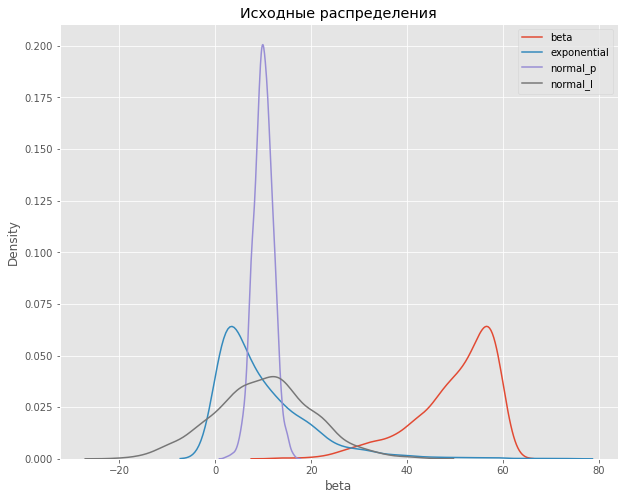

In [ ]:
# зададим параметры холста, название и визуализируем кривые распределения:
fig, (ax1) = plt.subplots(ncols=1, figsize=(10, 8))
ax1.set_title('Исходные распределения')

# kdeplot() (KDE – оценка плотности ядра) – специальный метод для графиков распределений
sns.kdeplot(df['beta'], ax=ax1, label ='beta')
sns.kdeplot(df['exponential'], ax=ax1, label ='exponential')
sns.kdeplot(df['normal_p'], ax=ax1, label ='normal_p')
sns.kdeplot(df['normal_l'], ax=ax1, label ='normal_l')
plt.legend()

Признаки распределены по-разному: смещены влево, вправо, присутствуют отрицательные величины. Попробуем нормализовать их.
Для нормализации данных мы будем использовать уже знакомую нам библиотеку sklearn.

### MinMaxScaler

Нормализация происходит следующим способом:

    Из каждого значения признака х вычитается минимальное значение этого признака:  x - min
    Результат вычитания делится на между максимумом и минимумом признака: max - min

    Xscaled = (x-x_min)/(x_max-x_min)



<AxesSubplot:title={'center':'После нормализации MinMaxScaler'}, xlabel='beta', ylabel='Density'>

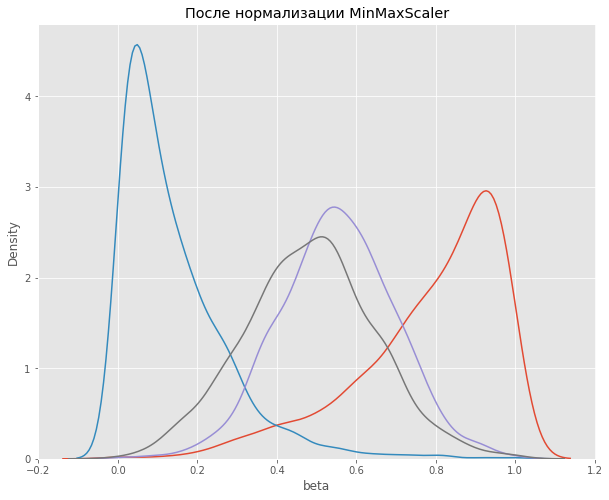

In [ ]:
# инициализируем нормализатор MinMaxScaler
mm_scaler = preprocessing.MinMaxScaler()

# копируем исходный датасет
df_mm = mm_scaler.fit_transform(df)

# Преобразуем промежуточный датасет в полноценный датафрейм для визуализации
df_mm = pd.DataFrame(df_mm, columns=col_names)

fig, (ax1) = plt.subplots(ncols=1, figsize=(10, 8))
ax1.set_title('После нормализации MinMaxScaler')

sns.kdeplot(df_mm['beta'], ax=ax1)
sns.kdeplot(df_mm['exponential'], ax=ax1)
sns.kdeplot(df_mm['normal_p'], ax=ax1)
sns.kdeplot(df_mm['normal_l'], ax=ax1)

### RobustScaler

Нормализация методом RobustScaler происходит в несколько этапов:

    1) из каждого значения признака вычитается медиана признака: x - медиана
    2) полученное значение делится на межквартильный размах: значение 75% - значение 25%

x_scaled = (x-x_median)/IQR

<AxesSubplot:title={'center':'Распределения после RobustScaler'}, xlabel='beta', ylabel='Density'>

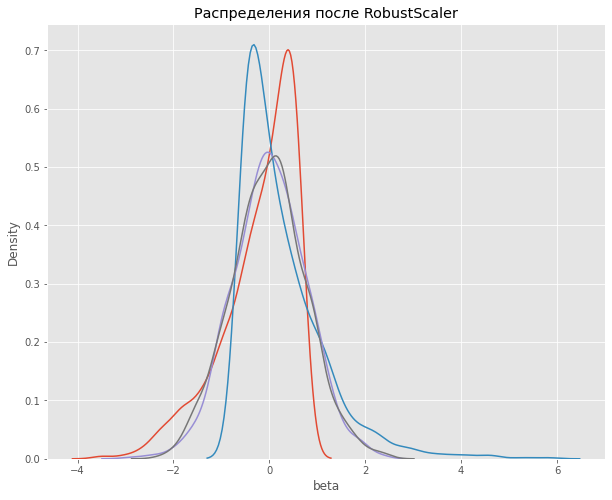

In [ ]:
# инициализируем нормализатор RobustScaler
r_scaler = preprocessing.RobustScaler()

# копируем исходный датасет
df_r = r_scaler.fit_transform(df)

# Преобразуем промежуточный датасет в полноценный датафрейм для визуализации
df_r = pd.DataFrame(df_r, columns=col_names)

fig, (ax1) = plt.subplots(ncols=1, figsize=(10, 8))
ax1.set_title('Распределения после RobustScaler')

sns.kdeplot(df_r['beta'], ax=ax1)
sns.kdeplot(df_r['exponential'], ax=ax1)
sns.kdeplot(df_r['normal_p'], ax=ax1)
sns.kdeplot(df_r['normal_l'], ax=ax1)

Из описательных статистик видно, что RobustScaler не масштабирует данные в заданный интервал, как делает это MinMaxScaler. Однако распределения не сохранили своё исходное состояние. Левый хвост экспоненциального распределения стал практически незаметным. То же произошло и с бета-распределением. Они стали более нормальными.

### В чём разница?

- Поскольку MinMaxScaler использует в своём вычислении минимальное и максимальное значения признака, то этот способ будет чувствителен к наличию выбросов в распределении.

- RobustScaler в вычислении использует перцентили, и поэтому не зависит даже от большого количества выбросов.

Поэтому, если ваши данные уже были очищены от выбросов, смело используйте MinMaxScaler. Этот алгоритм нормализации используется специалистами по данным чаще всего в силу его простоты и понятности, а данные на этом этапе чаще всего уже очищены. Если вы пропустили этап очистки данных и нормализуете признаки раньше, используйте нормализатор RobustScaler.

### Стандартизация 

Стандартизация — ещё один метод преобразования входных признаков, при котором изменяется распределение таким образом, чтобы среднее значений равнялось 0, а стандартное отклонение — 1. 

Этот процесс можно описать как центрирование данных с масштабированием. Сначала происходит вычитание среднего значения из всех данных — центрирование,  а затем деление на отклонение. 

### Для чего необходимо такое преобразование?

Как и нормализация, стандартизация может быть полезна при данных с разными масштабами. Однако в отличие от нормализации стандартизация предполагает, что признак распределён нормально.

Чтобы понять, как стандартизация меняет распределение, рассмотрим метод стандартизации StandardScaler в Python.

### StandardScaler
Для стандартизации используем класс StandardScaler.

<AxesSubplot:title={'center':'Распределения после StandardScaler'}, xlabel='beta', ylabel='Density'>

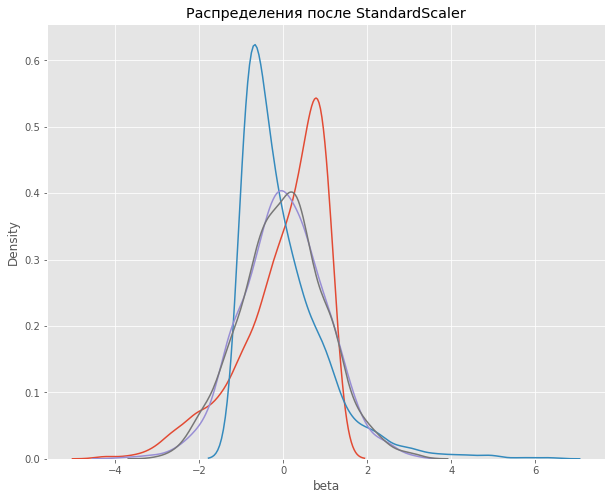

In [ ]:
# инициализируем стандартизатор StandardScaler
s_scaler = preprocessing.StandardScaler()

# копируем исходный датасет
df_s = s_scaler.fit_transform(df)

# Преобразуем промежуточный датасет в полноценный датафрейм для визуализации
df_s = pd.DataFrame(df_s, columns=col_names)

fig, (ax1) = plt.subplots(ncols=1, figsize=(10, 8))
ax1.set_title('Распределения после StandardScaler')

sns.kdeplot(df_s['beta'], ax=ax1)
sns.kdeplot(df_s['exponential'], ax=ax1)
sns.kdeplot(df_s['normal_p'], ax=ax1)
sns.kdeplot(df_s['normal_l'], ax=ax1)

### Нормализовать или стандартизировать?



Однако мы составили небольшую инструкцию по преобразованию признаков:

    если признак распределён нормально, то его необходимо стандартизировать;
    если признак распределён ненормально, его необходимо нормализовать;
    если разброс значений небольшой, то можно обойтись без преобразования данных.



In [ ]:
import pandas as pd
from sklearn import preprocessing
data_wine = pd.read_csv('wine_cleared.csv')

#data_wine

# инициализируем нормализатор RobustScaler
r_scaler = preprocessing.RobustScaler()

# копируем исходный датасет
df_r = r_scaler.fit_transform(data_wine[['price']])

df_r = pd.DataFrame(df_r, columns=['price'])
df_r['price'].sum(),

(43501.229482424984,)

In [ ]:
s_scaler = preprocessing.StandardScaler()

# копируем исходный датасет
df_s = s_scaler.fit_transform(data_wine[['price']])

df_s = pd.DataFrame(df_s, columns=['price'])
#df_s['price'].sum()
df_s['price'][129968]

-0.13551812448719314

## 7. Отбор признаков. Мультиколлинеарность

Отбор признаков — процесс выбора важных признаков, наиболее влияющих на предсказание.

### Для чего необходимо отбирать признаки?
1) Сократить время обучения. Чем меньше данных, тем быстрее обучается модель. Например, в скоринговых моделях часто количество признаков на этапе проектирования составляет больше 500, и дата-сайентисты делают отбор признаков, чтобы исключить те признаки, которые вносят наименьший вклад. В редких случаях количество признаков в модели может быть больше 100.

2) Повысить качество предсказания. Избыточные данные могут снижать точность предсказания, могут выступать в качестве «шума». Это явление называют мультиколлинеарностью, которую мы изучим ниже. Мы уже говорили о «проклятии размерности» в юните Работа с пропусками: методы обработки.

### Как понять, какие признаки больше всего влияют на предсказание?

Мультиколлинеарность — сильная корреляционная связь между признаками, отбираемыми для обучения. 

Сильно скоррелированные признаки сообщают для модели одну и ту же информацию. Поэтому для обучения не нужно использовать их все. Часть из них необходимо удалить из набора данных. 

Процесс корреляционного анализа и удаление сильно скоррелированных признаков относят к одному из методов отбора признаков.

In [ ]:
import pandas as pd

iris = pd.read_csv('data/iris.csv')
iris.head()

,sepal.length,sepal.width,petal.length,petal.width,variety
0,5.1,3.5,1.4,0.2,Setosa
1,4.9,3.0,1.4,0.2,Setosa
2,4.7,3.2,1.3,0.2,Setosa
3,4.6,3.1,1.5,0.2,Setosa
4,5.0,3.6,1.4,0.2,Setosa


Будем исследовать признаки, которые могут влиять на variety — sepal.length, sepal.width, petal.length, petal.width.

Проведём корреляционный анализ датасета и используем для этого тепловую карту корреляций признаков.

<AxesSubplot:>

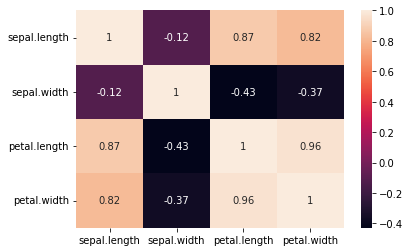

In [ ]:

import seaborn as sns # импортируем seaborn для построения графиков
sns.heatmap(iris.corr(), annot=True) # включаем отображение коэффициентов


Чтобы построить модель на этом наборе данных, сделаем отбор признаков — удалим признаки с очень сильной корреляцией (где коэффициент корреляции +/-0.7 и выше).

Как мы выяснили из тепловой карты корреляций, у нас есть три пары сильно скоррелированных признаков: sepal.length и petal.width, petal.length и sepal.length, petal.width и petal.length.

Начнём с самого высокого коэффициента корреляции в паре признаков: petal.width и petal.length 0,96. Удалим любой признак из этой пары, например petal.width, так как он коррелирует ещё и с признаком sepal.length:

In [ ]:
iris = iris.drop(['petal.width'], axis=1)

Однако второй признак petal.length из этой пары также сильно коррелирует с признаком sepal.length. Удалим и его:

In [ ]:
iris = iris.drop(['petal.length'], axis=1)

In [ ]:
iris.head()

,sepal.length,sepal.width,variety
0,5.1,3.5,Setosa
1,4.9,3.0,Setosa
2,4.7,3.2,Setosa
3,4.6,3.1,Setosa
4,5.0,3.6,Setosa


У нас осталось всего два признака с коэффициентом корреляции -0.12: sepal.width и sepal.length, и признак, который необходимо предсказать — variety. Связь между оставшимися признаками очень слабая, поэтому эти признаки будут включены в итоговый набор данных для обучения.

### Какой признак удалять?

Как понять, какой признак необходимо удалить из пары скоррелированных признаков?

Вы можете удалить любой признак из пары. Однако вы можете оставить в наборе данных тот признак, который легче будет использовать в дальнейшем. Например, для него не понадобится округление или нормализация. 

<AxesSubplot:>

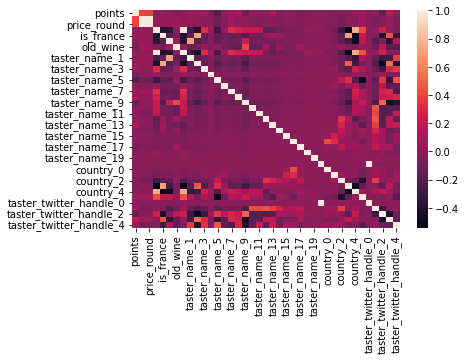

In [55]:
import pandas as pd
import seaborn as sns # импортируем seaborn для построения графиков


sns.heatmap(data_4.corr()) # включаем отображение коэффициентов

<AxesSubplot:>

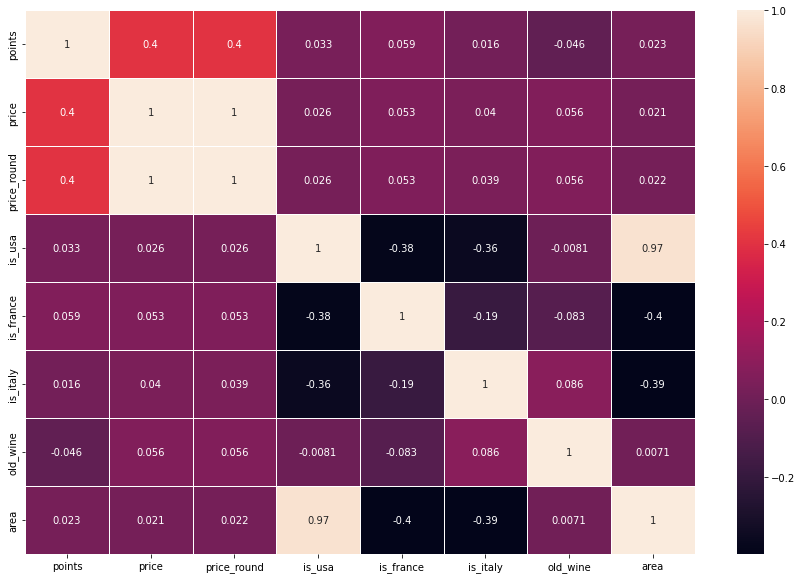

In [63]:
import pandas as pd
import seaborn as sns # импортируем seaborn для построения графиков


sns.heatmap(data_4.corr()) # включаем отображение коэффициентов

<AxesSubplot:>

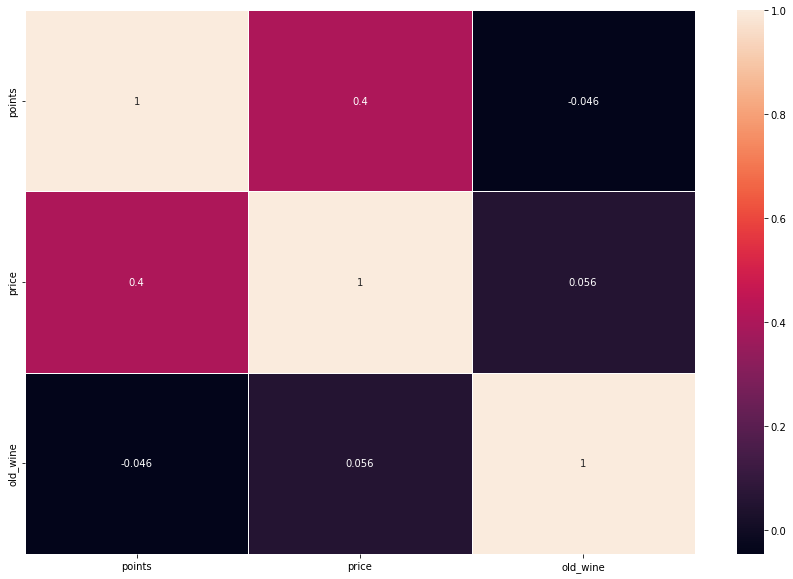

In [64]:
data_2_1 = data_2.drop(['price_round', 'is_usa', 'area', 'is_france', 'is_italy'], axis=1)

fig, ax = plt.subplots(figsize=(15,10))
sns.heatmap(data_2_1.corr(), annot=True, linewidths=.5, ax=ax)